<a href="https://colab.research.google.com/github/MichalMichniak/ML2/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import keras

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
from keras import layers,models

network = models.Sequential()
network.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64,(3,3), activation='relu', input_shape=(13,13,32)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64,(3,3), activation='relu', input_shape=(5,5,64)))

network.add(layers.Flatten())
network.add(layers.Dense(64, activation='relu', input_shape=(576,)))
network.add(layers.Dense(10, activation='softmax'))


In [9]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [10]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'], run_eagerly=True)

In [11]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [12]:

history = network.fit(x=train_images, y= train_labels, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 35s 37ms/step - loss: 0.3483 - accuracy: 0.9397
Epoch 2/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0596 - accuracy: 0.9832
Epoch 3/5
938/938 [==============================] - 34s 36ms/step - loss: 0.0394 - accuracy: 0.9890
Epoch 4/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0346 - accuracy: 0.9902
Epoch 5/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0290 - accuracy: 0.9925


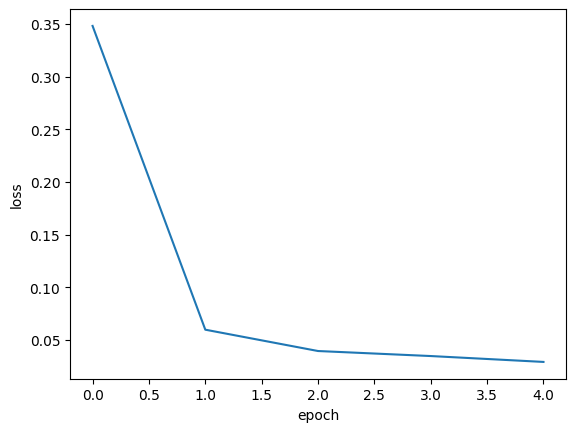

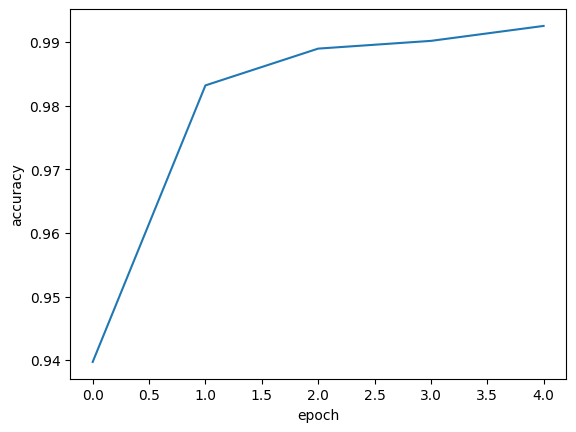

In [14]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

plt.plot(history_dict['loss'], label = "training loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

plt.plot(history_dict['accuracy'], label = "training accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()


In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print('test_acc:', test_acc)

313/313 [==============================] - 5s 16ms/step - loss: 0.0491 - accuracy: 0.9888
test_acc: 0.9887999892234802
